In [1]:
#import numpy as np
from math import exp
from math import log2
from numpy.linalg import inv
 
class MyLinearUnivariateRegression:
    def __init__(self):
        self.intercept_ = 0.0
        self.coef_ = 0.0

    # learn a linear univariate regression model by using training inputs (x) and outputs (y) 
    def fit(self, x, y):
        sx = sum(x)
        sy = sum(y)
        sx2 = sum(i * i for i in x)
        sxy = sum(i * j for (i,j) in zip(x, y))
        w1 = (len(x) * sxy - sx * sy) / (len(x) * sx2 - sx * sx)
        w0 = (sy - w1 * sx) / len(x)
        self.intercept_, self.coef_ =  w0, w1

    # predict the outputs for some new inputs (by using the learnt model)
    def predict(self, x):
        if (isinstance(x[0], list)):
            return [self.intercept_ + self.coef_ * val[0] for val in x]
        else:
            return [self.intercept_ + self.coef_ * val for val in x]

In [2]:
def create_identity_matrix(n):
    identity_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        identity_matrix[i][i] = 1
    return identity_matrix

def transpose(matrix):
    return [[matrix[j][i] for j in range(len(matrix))] for i in range(len(matrix[0]))]

def multiply_matrices(matrix1, matrix2):
    result = [[0] * len(matrix2[0]) for _ in range(len(matrix1))]
    for i in range(len(matrix1)):
        for j in range(len(matrix2[0])):
            for k in range(len(matrix2)):
                result[i][j] += matrix1[i][k] * matrix2[k][j]
    return result

def inverse(matrix):
    n = len(matrix)
    if n != len(matrix[0]):
        print("Matrix is not square. Inverse cannot be calculated.")
        return None

    augmented_matrix = [row[:] + identity_row for row, identity_row in zip(matrix, create_identity_matrix(n))]

    # Gauss-Jordan
    for col in range(n):

        for row in range(col, n):
            if augmented_matrix[row][col] != 0:
                break
        else:
            print("Matrix is singular. Inverse cannot be calculated.")
            return None

        augmented_matrix[col], augmented_matrix[row] = augmented_matrix[row], augmented_matrix[col]

        pivot = augmented_matrix[col][col]
        augmented_matrix[col] = [element / pivot for element in augmented_matrix[col]]

        for row in range(n):
            if row != col:
                factor = augmented_matrix[row][col]
                augmented_matrix[row] = [x - factor * y for x, y in zip(augmented_matrix[row], augmented_matrix[col])]

    inverse_matrix = [row[n:] for row in augmented_matrix]

    return inverse_matrix

In [3]:
def linear_regression_manual(train_inputs, train_output, validation_inputs, validation_output):
    
    X_transpus = [[1] * len(train_inputs[0])] + train_inputs
    
    # M = X_transpus * X
    M = []
    for row1 in X_transpus:
        line = []
        for row2 in X_transpus:
            line.append(sum([x * y for x, y in zip(row1, row2)]))
        M.append(line)

    M_inverse = inverse(M)
    
    M_inverse_X_transpus = []

    for row in M_inverse:
        line = []
        for row1 in transpose(X_transpus):
            line.append(sum([x * y for x, y in zip(row, row1)]))
        M_inverse_X_transpus.append(line)

    M_inverse_X_transpus_Y = []

    for row in M_inverse_X_transpus:
        M_inverse_X_transpus_Y.append(sum([x * y for x, y in zip(row, train_output)]))

    w0, w1, w2 = M_inverse_X_transpus_Y[0], M_inverse_X_transpus_Y[1], M_inverse_X_transpus_Y[2]
    print('the learnt model (manual): f(x) = ', w0 , ' + ', w1, ' * x1 + ', w2, ' * x2')

    y = []
    for x1, x2 in zip(*validation_inputs):
        y.append(w0 + w1 * x1 + w2 * x2)
    
    error = 0.0
    for t1, t2 in zip(y, validation_output):
        error += (t1-t2) ** 2
    error = error / len(validation_output)
    print("Prediction error (manual): ", error)

    return w0, w1, w2

In [4]:
import csv
def loadData(fileName, inputVariabName, outputVariabName):
    data = []
    dataNames = []
    with open(fileName) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                dataNames = row
            else:
                data.append(row)
            line_count += 1
            
    selected_variables_index = [dataNames.index(variable) for variable in inputVariabName]
    inputs = []
    for var in selected_variables_index:
        inputs.append([data[index][var] for index in range(len(data))])

    output_selected_index = dataNames.index(outputVariabName)
    outputs = [data[index][output_selected_index] for index in range(len(data))]

    return inputs, outputs

In [5]:
def generateTrainingTest(inputs, outputs):
    np.random.seed(5)
    indexes = [i for i in range(len(outputs))]
    train_sample = np.random.choice(indexes, int(0.8 * len(outputs)), replace=False)
    validation_sample = [i for i in indexes if i not in train_sample]

    train_inputs = [[float(inputs[0][index]) for index in train_sample], [float(inputs[1][index]) for index in train_sample]]
    train_output = [float(outputs[index]) for index in train_sample]

    validation_inputs = [[float(inputs[0][index]) for index in validation_sample], [float(inputs[1][index]) for index in validation_sample]]
    validation_output = [float(outputs[index]) for index in validation_sample]

    return train_inputs, train_output, validation_inputs, validation_output

the learnt model (manual): f(x) =  -1.6931366420940717  +  4.666666666666667  * x1
prediction error (manual):  1.4889699655161457


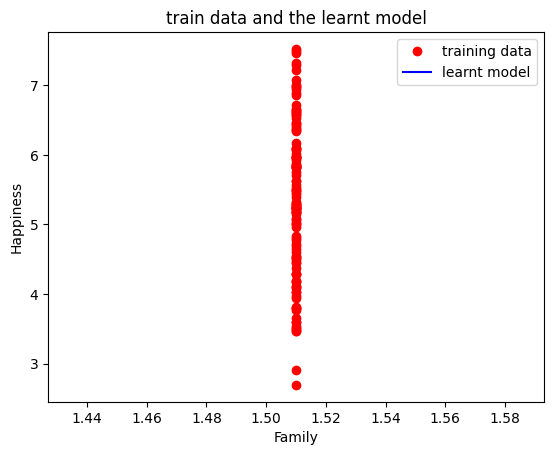

In [7]:
import matplotlib.pyplot as plt
import numpy as np

filePath1 = "data/v1_world-happiness-report-2017.csv"

inputs, outputs = loadData(filePath1, ['Family'], 'Happiness.Score')

np.random.seed(5)
indexes = [i for i in range(len(inputs[0]))]
trainSample = np.random.choice(indexes, int(0.8 * len(inputs[0])), replace=False)
validationSample = [i for i in indexes  if not i in trainSample]
trainInputs = [float(inputs[0][i]) for i in trainSample]
trainOutputs = [float(outputs[i]) for i in trainSample]
validationInputs = [float(inputs[0][i]) for i in validationSample]
validationOutputs = [float(outputs[i]) for i in validationSample]

manual_regressor = MyLinearUnivariateRegression()
manual_regressor.fit(trainInputs, trainOutputs)

w0, w1 = manual_regressor.intercept_, manual_regressor.coef_

print('the learnt model (manual): f(x) = ', w0, ' + ', w1, ' * x1')

computedValidationOutputs = manual_regressor.predict([[x] for x in validationInputs])

error = 0.0
for t1, t2 in zip(computedValidationOutputs, validationOutputs):
    error += (t1 - t2) ** 2
error = error / len(validationOutputs)
print('prediction error (manual): ', error)


noOfPoints = 1000
xref = []
val = min(trainInputs)
step = (max(trainInputs) - min(trainInputs)) / noOfPoints
for i in range(1, noOfPoints):
    xref.append(val)
    val += step
yref = [w0 + w1 * el for el in xref] 

plt.plot(trainInputs, trainOutputs, 'ro', label = 'training data')
plt.plot(xref, yref, 'b-', label = 'learnt model')                  
plt.title('train data and the learnt model')
plt.xlabel('Family')
plt.ylabel('Happiness')
plt.legend()
plt.show()

the learnt model (manual): f(x) =  2.5283663169529014  +  1.8763387360090573  * x1 +  2.3147487477232174  * x2
Prediction error (manual):  0.27782674362001264


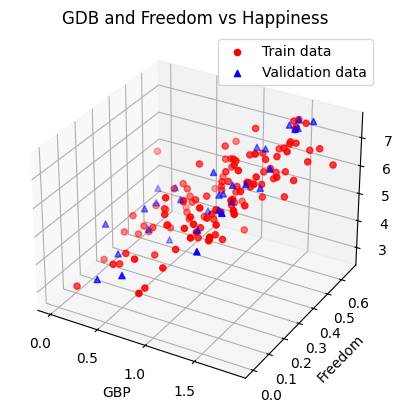

In [22]:
filePath1 = "data/v1_world-happiness-report-2017.csv"

inputs, outputs = loadData(filePath1, ['Economy..GDP.per.Capita.', 'Freedom'], 'Happiness.Score')

train_inputs, train_output, validation_inputs, validation_output = generateTrainingTest(inputs, outputs)

w0, w1, w2 = linear_regression_manual(train_inputs, train_output, validation_inputs, validation_output)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_inputs[0], train_inputs[1], train_output, c='r', marker='o', label='Train data')
ax.scatter(validation_inputs[0], validation_inputs[1], validation_output, c='b', marker='^', label='Validation data')
ax.set_xlabel("GBP")
ax.set_ylabel("Freedom")
ax.set_zlabel("Happiness")
plt.legend()
plt.title("GDB and Freedom vs Happiness")
plt.show()